In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import os

In [44]:
tennis_data = pd.read_csv("playtennis.csv", encoding = "utf-8")

In [45]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [46]:
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny", 0)
tennis_data.Outlook = tennis_data.Outlook.replace("Overcast", 1)
tennis_data.Outlook = tennis_data.Outlook.replace("Rain", 2)
tennis_data.Temperature = tennis_data.Temperature.replace("Hot", 1)
tennis_data.Temperature = tennis_data.Temperature.replace("Mild", 2)
tennis_data.Temperature = tennis_data.Temperature.replace("Cool", 3)
tennis_data.Humidity = tennis_data.Humidity.replace("High", 1)
tennis_data.Humidity = tennis_data.Humidity.replace("Normal", 2)
tennis_data.Wind = tennis_data.Wind.replace("Weak", 1)
tennis_data.Wind = tennis_data.Wind.replace("Strong", 2)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No", 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("Yes", 2)

In [47]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [48]:
X = np.array(pd.DataFrame(tennis_data, columns = [
    "Outlook", "Temperature", "Humidity", "Wind"]))
y = np.array(pd.DataFrame(tennis_data, columns = ["PlayTennis"]))

In [49]:
X

array([[0, 1, 1, 1],
       [0, 1, 1, 2],
       [1, 1, 1, 1],
       [2, 2, 1, 1],
       [2, 3, 2, 1],
       [2, 3, 2, 2],
       [1, 3, 2, 2],
       [0, 2, 1, 1],
       [0, 3, 2, 1],
       [2, 2, 2, 1],
       [0, 2, 2, 2],
       [1, 2, 1, 2],
       [1, 1, 2, 1],
       [2, 2, 1, 2]], dtype=int64)

In [50]:
y

array([[1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1]], dtype=int64)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [52]:
dt_clf = DecisionTreeClassifier()

In [53]:
dt_clf = dt_clf.fit(X_train, y_train)

In [54]:
dt_pred = dt_clf.predict(X_test)

In [55]:
print(confusion_matrix(y_test, dt_pred))

[[0 3]
 [0 1]]


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy = accuracy_score(y_test, dt_pred)

In [58]:
print(accuracy)

0.25


In [67]:
os.environ["PATH"] += os.pathsep + "C:/ai/program/Graphviz/bin/" 

In [68]:
os.environ["PATH"]

'C:\\ai\\Anaconda3;C:\\ai\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ai\\Anaconda3\\Library\\usr\\bin;C:\\ai\\Anaconda3\\Library\\bin;C:\\ai\\Anaconda3\\Scripts;C:\\ai\\Anaconda3\\bin;C:\\ai\\Anaconda3\\condabin;C:\\Program Files\\Java\\jdk1.8.0_251\\bin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files (x86)\\Windows Kits\\8.1\\Windows Performance Toolkit;C:\\Program Files\\Git\\cmd;C:\\Users\\L13\\AppData\\Local\\Microsoft\\WindowsApps;C:ai/program/Ghapviz/bin/;C:/ai/program/Ghapviz/bin/;C:/ai/program/Ghapviz/bin/;C:/ai/program/Graphviz/bin/'

In [61]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[:4]

In [62]:
feature_names

['Outlook', 'Temperature', 'Humidity', 'Wind']

In [63]:
target_name = np.array(["Play No", "Play Yes"])

In [64]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names, 
                                  class_names = target_name)

In [65]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

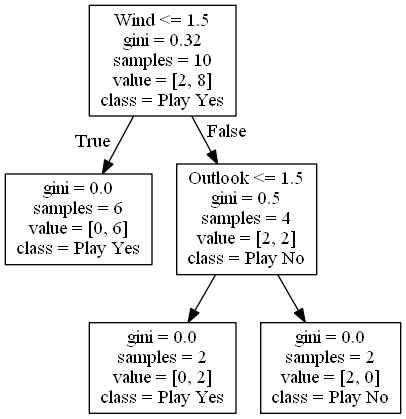

In [69]:
Image(dt_graph.create_png())

In [70]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

C:\ai\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [83]:
cancer = datasets.load_breast_cancer()

In [84]:
X = cancer.data
y = cancer.target

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
clf = DecisionTreeClassifier()

In [87]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
y_pred = clf.predict(X_test)

In [89]:
print(confusion_matrix(y_test, y_pred))

[[34  4]
 [ 2 74]]


In [90]:
accuracy_score(y_test, y_pred, normalize = True)

0.9473684210526315

In [91]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.89      0.92        38\n           1       0.95      0.97      0.96        76\n\n    accuracy                           0.95       114\n   macro avg       0.95      0.93      0.94       114\nweighted avg       0.95      0.95      0.95       114\n'

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.95      0.97      0.96        76

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [93]:
mean_squared_error(y_test, y_pred)

0.05263157894736842

In [94]:
skf = StratifiedKFold(n_splits=10)

In [95]:
skf.get_n_splits(X, y)

10

In [96]:
skf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [97]:
clf = DecisionTreeClassifier()

In [98]:
scores = cross_val_score(clf, X, y, cv = skf)

In [99]:
print(scores)

[0.93103448 0.86206897 0.9122807  0.89473684 0.96491228 0.89473684
 0.89473684 0.94642857 0.91071429 0.98214286]


In [100]:
scores.mean()

0.9193792671333506

In [101]:
skf_sh = StratifiedKFold(n_splits=10, shuffle=True)

In [102]:
skf_sh.get_n_splits(X, y)

10

In [103]:
skf_sh

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)

In [104]:
clf = DecisionTreeClassifier()

In [105]:
scores = cross_val_score(clf, X, y, cv=skf_sh)

In [106]:
scores

array([0.93103448, 0.93103448, 0.98245614, 0.87719298, 0.96491228,
       0.9122807 , 0.87719298, 0.92857143, 0.875     , 0.85714286])

In [107]:
scores.mean()

0.9136818338950826